In [1]:
import matplotlib.pyplot as plt # グラフ描画
import numpy as np # 数値計算
import pandas as pd # データフレーム

from sklearn.cluster import KMeans

In [2]:
# スクレイピング
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

url_team = 'https://www.bleague.jp/stats/?year=2023&tab=1&target=club-b1&value=AveragePoints/'
url_player = 'https://www.bleague.jp/stats/?year=2023&tab=1&target=player-b1&value=AveragePoints&o=desc&e=2&dt=avg'

In [4]:
# CSVに保存
import csv

# csv_file_name = f'bleague_stats_team_2324RS.csv'
csv_file_name = f'bleague_stats_PG_2324RS.csv'
f = open(csv_file_name, mode='w', encoding='cp932', errors='ignore') # ファイルを読み込むモードがw, shift-JISに対応しているのがcp932
writer = csv.writer(f, lineterminator='\n') # 書き込み, lineterminatorは改行方法

In [35]:
element = driver.find_element(By.XPATH, f'//table/tbody/tr[1]/td[8]')
sleep(5)
print(float(element.text))


20.1


In [14]:
#  プラス面：得点，リバウンド，スティール，アシスト，ブロック，被ファウル
csv_header = ["team","PPG", "RPG", "STPG", "APG", "BSPG", "FDPG"]
writer.writerow(csv_header) # 1行書き込み

# セットアップ
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
url = url_team
driver.get(url)
sleep(3)
try:
    n = 24 # B1チーム数
    for idx in range(1, n+1):
        # 各チームのスコア初期化
        csv_list = []
        team_name = driver.find_element(By.XPATH, f'//table/tbody/tr[{idx}]/td[2]/div/a/span[1]')
        sleep(3)
        csv_list.append(team_name.text)
        for element_idx in [3, 19, 22, 20, 23, 26]:
            element = driver.find_element(By.XPATH, f'//table/tbody/tr[{idx}]/td[{element_idx}]')
            sleep(5)
            csv_list.append(float(element.text)) 
        writer.writerow(csv_list)
    
finally:
    # ブラウザを閉じる
    # f.close()
    print("finish")

finish


In [4]:
# セットアップ
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
url = url_player
driver.get(url)
sleep(3)

# ポジション：PGを選ぶ
element_position = driver.find_element(By.XPATH, f'//div[@aria-label="4 / 6"]/dl/dd/select')
element_position.click()
sleep(3)
element_PG = driver.find_element(By.XPATH, f'//div[@aria-label="4 / 6"]/dl/dd/select/option[@value="PG"]')
element_PG.click()
sleep(3)

data = []

row_idx = 1
player_idx = row_idx
view_more_button_click_point = 50
while(player_idx <= 100):
    if player_idx > view_more_button_click_point:
        # 「もっと見る」ボタンを押す  
        view_more_button = driver.find_element(By.XPATH, '//a[text()="もっと見る"]')
        view_more_button.click()
        sleep(5)
        view_more_button_click_point += 50
        print(view_more_button_click_point)
    # 30試合以上出場の条件
    games = driver.find_element(By.XPATH, f'//table/tbody/tr[{row_idx}]/td[4]')
    sleep(3)
    if int(games.text) >= 30:
        # 各人のスコア初期化
        csv_list = []
        player_name = driver.find_element(By.XPATH, f'//table/tbody/tr[{row_idx}]/td[2]/a/span')
        sleep(3)
        csv_list.append(player_name.text)
        team_name = driver.find_element(By.XPATH, f'//table/tbody/tr[{row_idx}]/td[3]/span')
        sleep(3)
        csv_list.append(team_name.text)
        
        for element_idx in [8, 23, 26, 24, 27, 30]:
            element = driver.find_element(By.XPATH, f'//table/tbody/tr[{row_idx}]/td[{element_idx}]')
            sleep(5)
            csv_list.append(float(element.text))
        print(csv_list)
        data.append(csv_list)
        
    # 20ごとに登場する帯をスキップ  
    if player_idx % 20 == 0:
        row_idx +=2
        print("skip") 
    row_idx += 1
    player_idx += 1            

# ブラウザを閉じる
driver.quit()
print("finish")

['河村 勇輝', '横浜BC', 20.9, 3.0, 1.1, 8.1, 0.1, 5.8]
['安藤 誓哉', '島根', 20.4, 3.3, 0.6, 2.8, 0.0, 3.7]
['富樫 勇樹', '千葉J', 18.0, 1.8, 1.0, 5.4, 0.0, 3.4]
['D.J・ニュービル', '宇都宮', 16.3, 4.9, 1.3, 4.7, 0.2, 3.8]
['アンソニー・クレモンズ', 'SR渋谷', 15.8, 4.0, 1.5, 4.5, 0.2, 3.8]
['レイナルド・ガルシア', '佐賀', 15.6, 4.1, 1.9, 3.9, 0.3, 6.1]
['藤井 祐眞', '川崎', 13.3, 2.5, 1.2, 4.3, 0.1, 3.5]
['マシュー・ライト', '京都', 13.1, 3.0, 0.7, 3.2, 0.1, 1.7]
['岡田 侑大', '京都', 12.8, 2.0, 1.0, 6.4, 0.1, 4.1]
['齋藤 拓実', '名古屋D', 12.7, 2.0, 1.3, 6.2, 0.1, 3.1]
['佐々木 隆成', '三遠', 11.0, 1.5, 0.7, 3.0, 0.1, 1.9]
['岸本 隆一', '琉球', 10.9, 2.0, 0.8, 3.0, 0.1, 2.8]
['テーブス 海', 'A東京', 10.7, 2.1, 0.9, 4.8, 0.1, 3.0]
['ベンドラメ 礼生', 'SR渋谷', 10.7, 2.2, 1.2, 3.3, 0.1, 2.4]
['寺嶋 良', '広島', 10.6, 2.1, 1.0, 3.6, 0.1, 1.9]
['寺園 脩斗', '北海道', 10.5, 1.5, 0.6, 3.9, 0.0, 2.3]
['大浦 颯太', '三遠', 9.5, 2.4, 1.0, 5.2, 0.1, 1.7]
['コー・フリッピン', '群馬', 8.2, 2.9, 1.9, 4.1, 0.3, 1.9]
['熊谷 航', '秋田', 8.2, 2.1, 0.8, 4.2, 0.0, 2.8]
['遠藤 祐亮', '宇都宮', 8.1, 1.7, 0.6, 1.4, 0.0, 0.6]
skip
['石川 海斗', '信州', 7.9, 1

In [1]:
import pandas as pd
df_team = pd.read_csv(f'bleague_stats_team_2324RS.csv', encoding='cp932')
df_team.head()

,team,PPG,RPG,STPG,APG,BSPG,FDPG
0,レバンガ北海道,75.3,36.4,6.8,16.7,2.5,17.0
1,富山グラウジーズ,72.0,35.0,5.9,16.6,2.2,16.5
2,秋田ノーザンハピネッツ,74.2,40.5,6.5,18.9,2.1,17.5
3,茨城ロボッツ,76.3,37.3,5.2,17.8,1.8,18.3
4,宇都宮ブレックス,81.6,39.2,6.2,19.2,2.6,17.6


In [2]:
X1 = df_team.drop('team',axis=1)

In [5]:
columns = ["player","team", "PPG", "RPG", "STPG", "APG", "BSPG", "FDPG"]
df = pd.DataFrame(data, columns=columns)
# CSVファイルに保存
df.to_csv('bleague_stats_PG_2324RS.csv', index=False, encoding='cp932')

In [28]:
import pandas as pd
df_player = pd.read_csv(f'bleague_stats_PG_2324RS.csv', encoding='cp932')
df_player.head()

,player,team,PPG,RPG,STPG,APG,BSPG,FDPG
0,河村 勇輝,横浜BC,20.9,3.0,1.1,8.1,0.1,5.8
1,安藤 誓哉,島根,20.4,3.3,0.6,2.8,0.0,3.7
2,富樫 勇樹,千葉J,18.0,1.8,1.0,5.4,0.0,3.4
3,D.J・ニュービル,宇都宮,16.3,4.9,1.3,4.7,0.2,3.8
4,アンソニー・クレモンズ,SR渋谷,15.8,4.0,1.5,4.5,0.2,3.8


In [29]:
X2 = df_player.drop(['player','team'], axis=1)
len(X2)

78

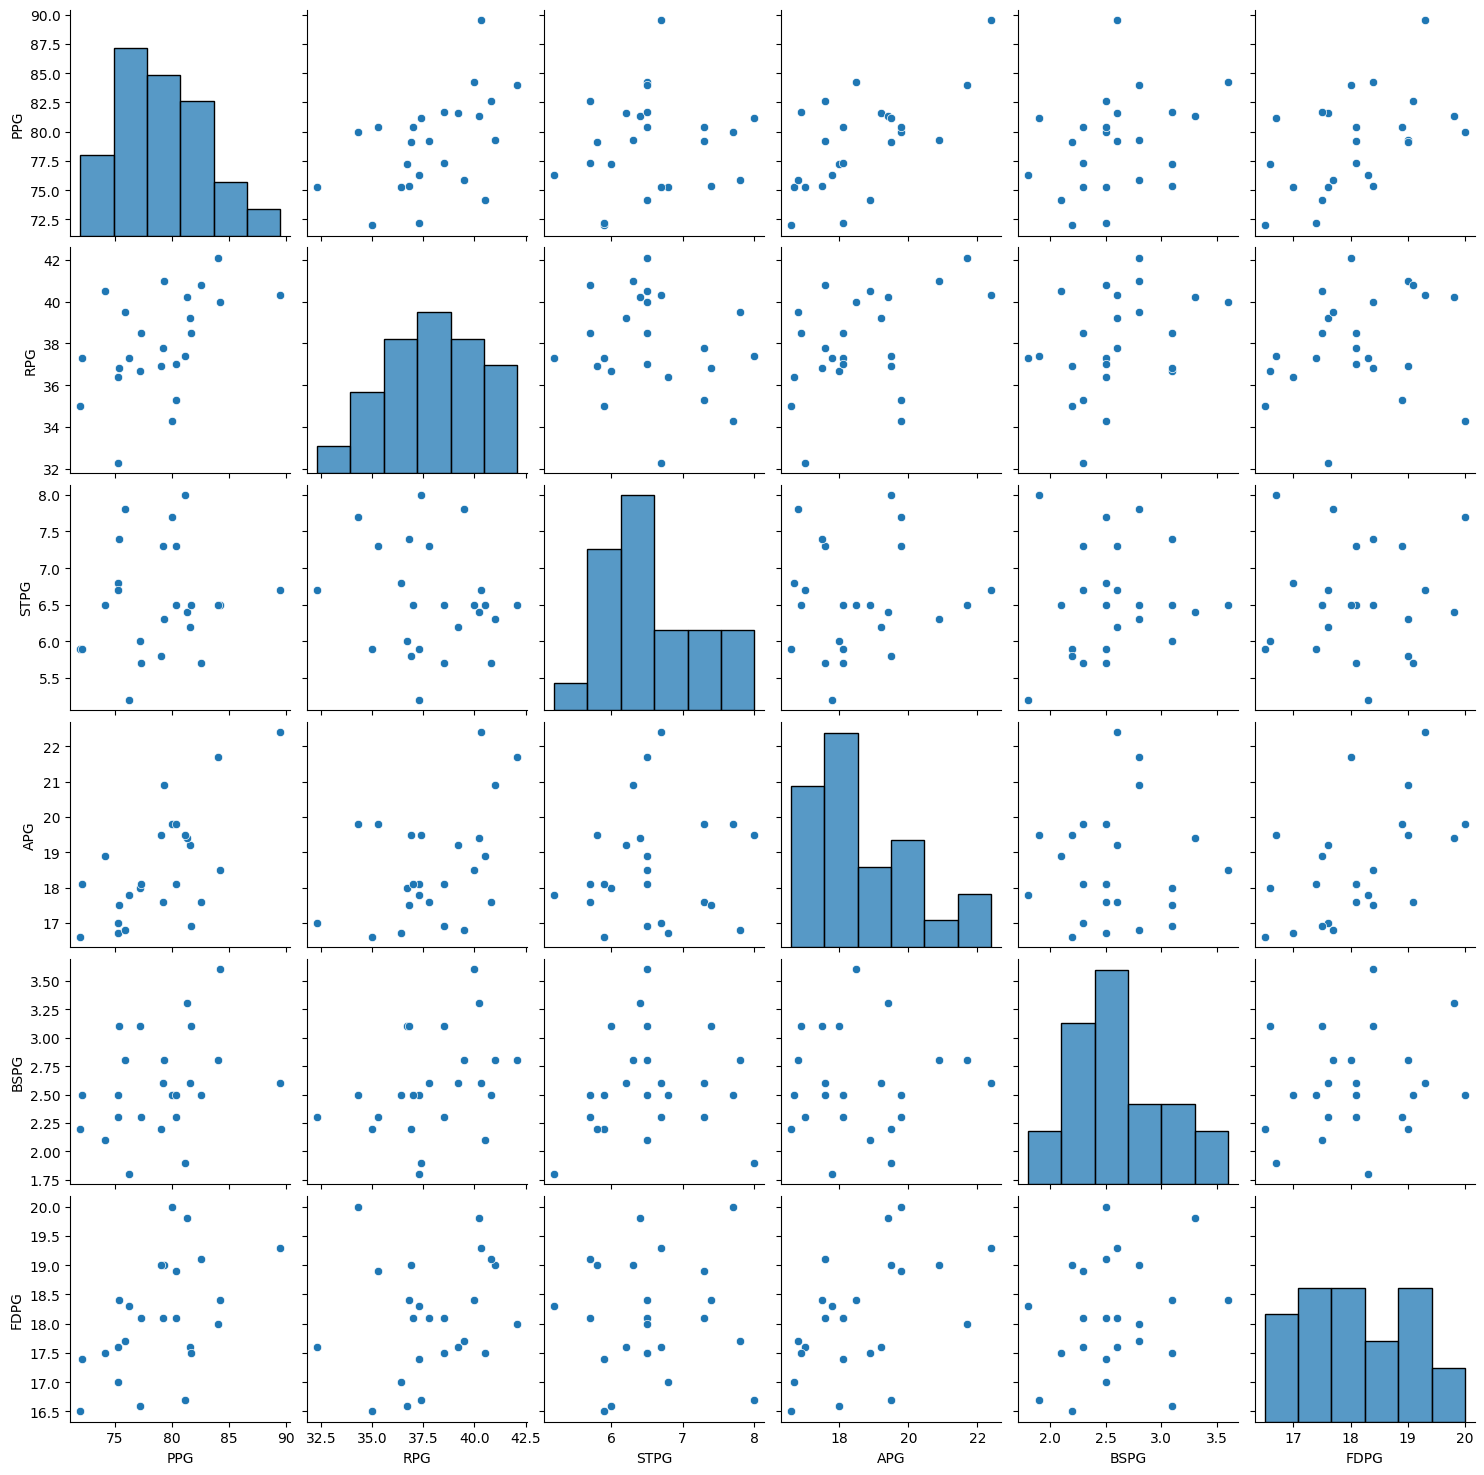

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(X1)
plt.show()

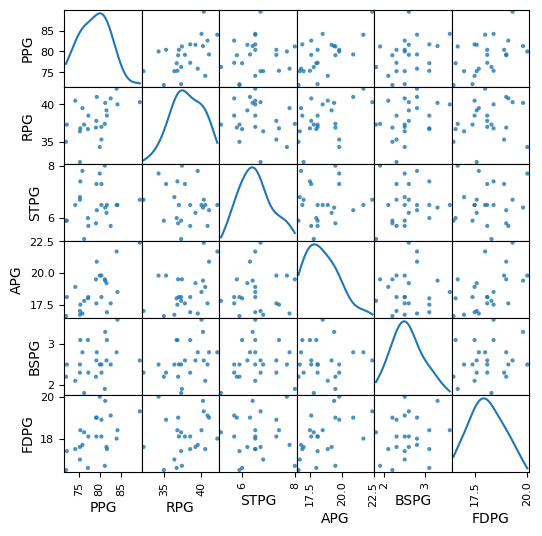

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import plotting # 高度なプロットを行うツールのインポート

plotting.scatter_matrix(X1, figsize=(6,6), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

           PPG       RPG      STPG       APG      BSPG      FDPG
PPG   1.000000  0.486690  0.128703  0.660980  0.324219  0.503437
RPG   0.486690  1.000000 -0.180563  0.438130  0.352587  0.213145
STPG  0.128703 -0.180563  1.000000  0.083462  0.111396  0.037902
APG   0.660980  0.438130  0.083462  1.000000  0.020412  0.507505
BSPG  0.324219  0.352587  0.111396  0.020412  1.000000  0.194196
FDPG  0.503437  0.213145  0.037902  0.507505  0.194196  1.000000


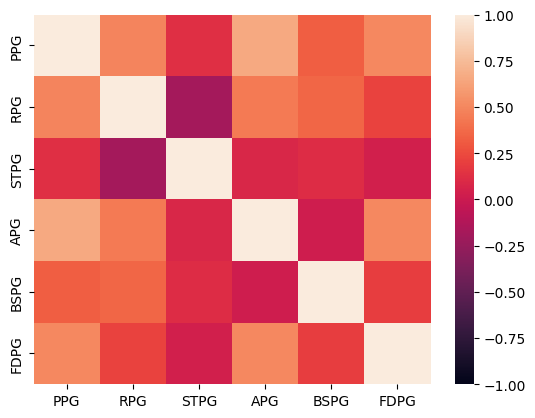

In [4]:
import seaborn as sns
# 相関関係
corr_matrix = X1.corr()
print(corr_matrix)
# ヒートマップ
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.show()

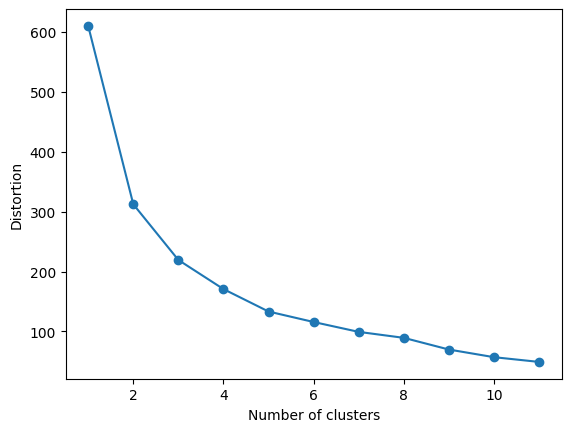

In [7]:
# エルボー法によるkの決定
inertia = []
max_n_clusters = 12
for n_clusters in range(1, max_n_clusters):
    # MEMO: このコードの意味は参照 https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X1)
    inertia.append(km.inertia_)

# 図の表示
plt.plot(range(1,12),inertia , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [8]:
K = 4
# MEMO: パラメータはどう決める？何をどう変えるとよい？自分でもいくつか試してみる
km = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X1)

In [9]:
from collections import Counter
cluster_labels = km.labels_

# クラスタごとのデータ数を数える
cluster_count = Counter(cluster_labels)

# 各クラスタに所属するデータ数を表示
for cluster, count in cluster_count.items():
    print(f"クラスタ {cluster}: {count} チーム")

クラスタ 1: 10 チーム
クラスタ 0: 6 チーム
クラスタ 3: 7 チーム
クラスタ 2: 1 チーム


In [10]:
# K-meansによってクラスタリングされた結果（各データ点の所属するクラスタ）を取得
cluster_labels = km.labels_

# 各クラスタごとにデータ点のインデックスを取得
cluster_indices = {}
for cluster in range(K):
    cluster_indices[cluster] = [index for index, label in enumerate(cluster_labels) if label == cluster]

# 各クラスタに属するデータ点の名前を表示
for cluster, indices in cluster_indices.items():
    print(f"クラスタ {cluster} に属するチーム:")
    for index in indices:
        print(df_team['team'][index])
    print()

クラスタ 0 に属するチーム:
宇都宮ブレックス
千葉ジェッツ
アルバルク東京
仙台89ERS
名古屋ダイヤモンドドルフィンズ
琉球ゴールデンキングス

クラスタ 1 に属するチーム:
レバンガ北海道
富山グラウジーズ
秋田ノーザンハピネッツ
茨城ロボッツ
サンロッカーズ渋谷
横浜ビー・コルセアーズ
信州ブレイブウォリアーズ
ファイティングイーグルス名古屋
京都ハンナリーズ
佐賀バルーナーズ

クラスタ 2 に属するチーム:
三遠ネオフェニックス

クラスタ 3 に属するチーム:
群馬クレインサンダーズ
川崎ブレイブサンダース
シーホース三河
大阪エヴェッサ
島根スサノオマジック
広島ドラゴンフライズ
長崎ヴェルカ



In [11]:
for cluster, indices in cluster_indices.items():
    if cluster == 3:
        print(f"クラスタ {cluster} に属するチーム:")
        for index in indices:
            print(df_team['team'][index])
        print()

クラスタ 3 に属するチーム:
群馬クレインサンダーズ
川崎ブレイブサンダース
シーホース三河
大阪エヴェッサ
島根スサノオマジック
広島ドラゴンフライズ
長崎ヴェルカ



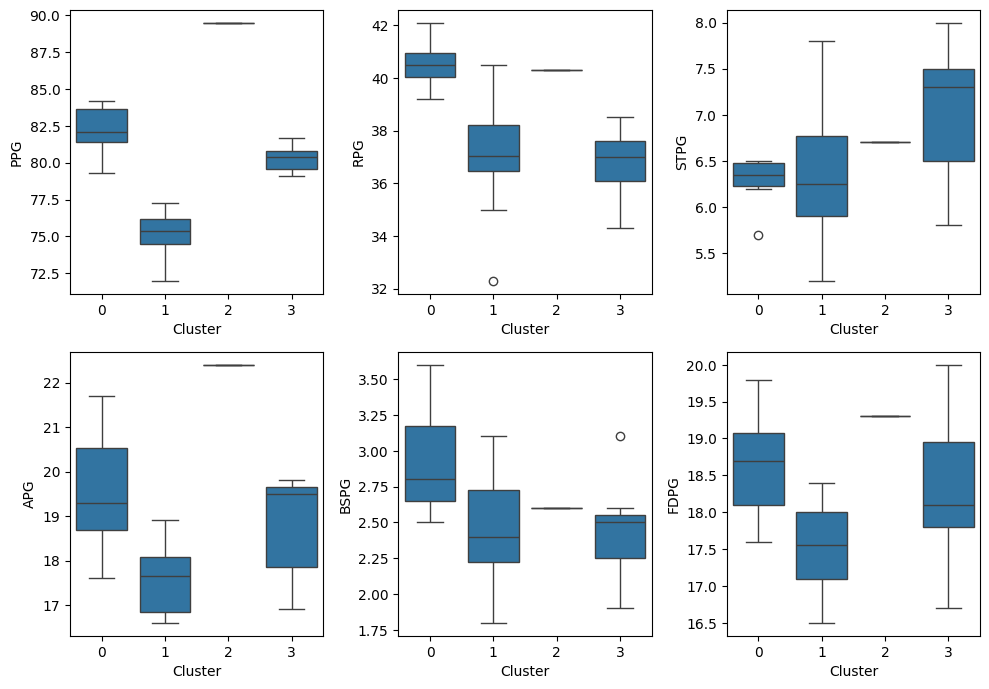

In [11]:
# 箱ひげ図によるクラスタごとの特徴量の比較
# MEMO: なぜ箱ひげ図？他にどういうときに箱ひげ図は活用できる？

csv_header = ["team","PPG", "RPG", "STPG", "APG", "BSPG", "FDPG"]
df_team = pd.DataFrame(X1, columns=csv_header)
df_team['Cluster'] = y_km
plt.figure(figsize=(10, 7))
for num, feature in enumerate(csv_header[1:]): # Cluster以外の列
    plt.subplot(2, 3, num+1)
    sns.boxplot(x='Cluster', y=feature, data=df_team)
plt.tight_layout()
plt.show()

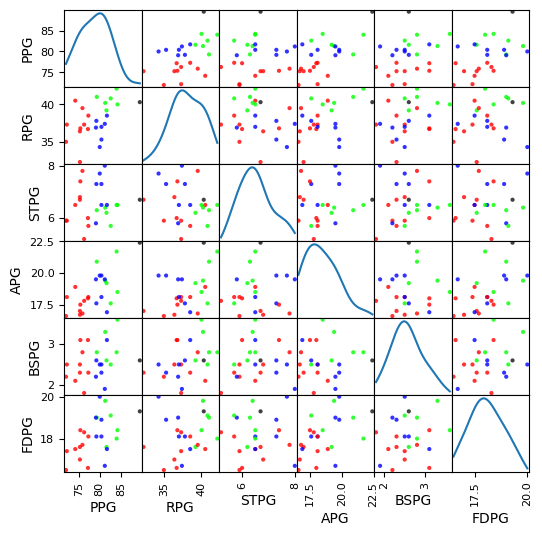

In [12]:
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#111111', 3:'#0000FF'}
# サンプル毎に色を与える
colors = [color_codes[x] for x in cluster_labels]
# 色分けした Scatter Matrix を描く
plotting.scatter_matrix(X1, figsize=(6,6), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
plt.show()

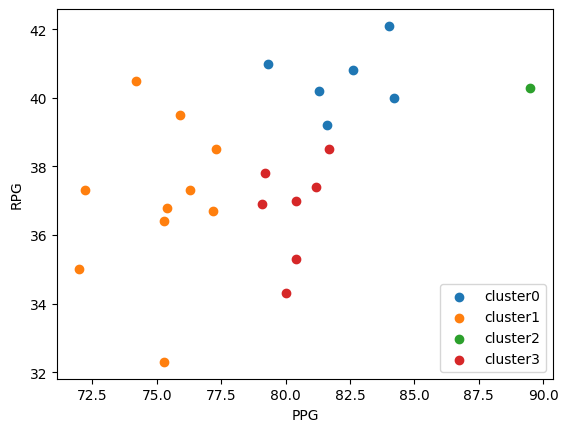

In [16]:
# クラスタごとに色分けしてデータの可視化
plt.xlabel('PPG')
plt.ylabel('RPG')
for n_cluster in np.sort(df_team['Cluster'].unique()):
    plt.scatter(df_team[df_team['Cluster']==n_cluster]['PPG'], df_team[df_team['Cluster']==n_cluster]['RPG'], label=f'cluster{n_cluster}')
plt.legend()

           PPG       RPG      STPG       APG      BSPG      FDPG
PPG   1.000000  0.722809  0.634321  0.739839  0.316274  0.875446
RPG   0.722809  1.000000  0.784704  0.615747  0.568012  0.713620
STPG  0.634321  0.784704  1.000000  0.711410  0.555906  0.702966
APG   0.739839  0.615747  0.711410  1.000000  0.215310  0.801611
BSPG  0.316274  0.568012  0.555906  0.215310  1.000000  0.310585
FDPG  0.875446  0.713620  0.702966  0.801611  0.310585  1.000000


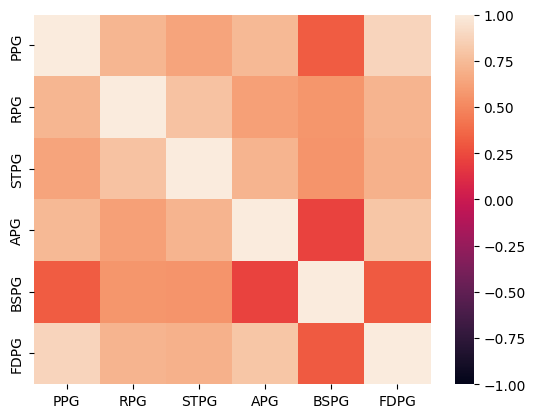

In [30]:
import seaborn as sns
# 相関関係
corr_matrix = X2.corr()
print(corr_matrix)
# ヒートマップ
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.show()

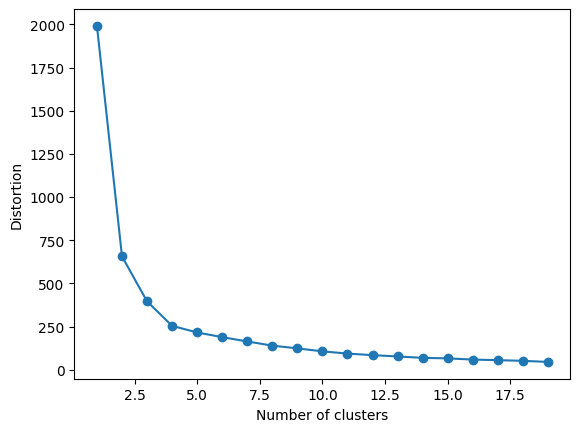

In [31]:
# エルボー法によるkの決定
inertia = []
max_n_clusters = 20
for n_clusters in range(1, max_n_clusters):
    # MEMO: このコードの意味は参照 https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X2)
    inertia.append(km.inertia_)

# 図の表示
plt.plot(range(1,20),inertia , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [32]:
K = 4 # TODO
# MEMO: パラメータはどう決める？何をどう変えるとよい？自分でもいくつか試してみる
km = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X2)

In [33]:
from collections import Counter
cluster_labels = km.labels_

# クラスタごとのデータ数を数える
cluster_count = Counter(cluster_labels)

# 各クラスタに所属するデータ数を表示
for cluster, count in cluster_count.items():
    print(f"クラスタ {cluster}: {count} 人")

クラスタ 2: 6 人
クラスタ 1: 11 人
クラスタ 3: 26 人
クラスタ 0: 35 人


In [36]:
# K-meansによってクラスタリングされた結果（各データ点の所属するクラスタ）を取得
cluster_labels = km.labels_

# 各クラスタごとにデータ点のインデックスを取得
cluster_indices = {}
for cluster in range(K):
    cluster_indices[cluster] = [index for index, label in enumerate(cluster_labels) if label == cluster]

# 各クラスタに属するデータ点の名前を表示
for cluster, indices in cluster_indices.items():
    print(f"クラスタ {cluster} に属するPG:")
    for index in indices[1:]:
        print(df_player['player'][index])
        
    print()

クラスタ 0 に属するPG:
小野寺 祥太
小川 麻斗
上澤 俊喜
渡邉 裕規
中村 浩陸
アイザイア・マーフィー
牧 隼利
水野 幹太
多嶋 朝飛
青木 龍史
伊藤 駿
合田 怜
大倉 颯太
西村 文男
小林 遥太
伊藤 達哉
大庭 圭太郎
小栗 瑛哉
山内 盛久
納見 悠仁
松下 裕汰
岸田 篤生
橋本 竜馬
山本 楓己
荒川 颯
小西 聖也
森井 健太
菅原 暉
福澤 晃平
坂本 聖芽
相原 アレクサンダー学
山下 泰弘
小島 元基
北川 弘






In [39]:
# 各クラスタに属するデータ点の名前を表示
for cluster, indices in cluster_indices.items():
    if cluster == 1:
        print(f"クラスタ {cluster} に属するPG:")
        for index in indices:
            print(df_player['player'][index])
            
        print()

クラスタ 1 に属するPG:
藤井 祐眞
マシュー・ライト
岡田 侑大
齋藤 拓実
佐々木 隆成
岸本 隆一
テーブス 海
ベンドラメ 礼生
寺嶋 良
寺園 脩斗
大浦 颯太



In [38]:
# 各クラスタに属するデータ点の名前を表示
for cluster, indices in cluster_indices.items():
    if cluster == 2:
        print(f"クラスタ {cluster} に属するPG:")
        for index in indices:
            print(df_player['player'][index])
            
        print()

クラスタ 2 に属するPG:
河村 勇輝
安藤 誓哉
富樫 勇樹
D.J・ニュービル
アンソニー・クレモンズ
レイナルド・ガルシア



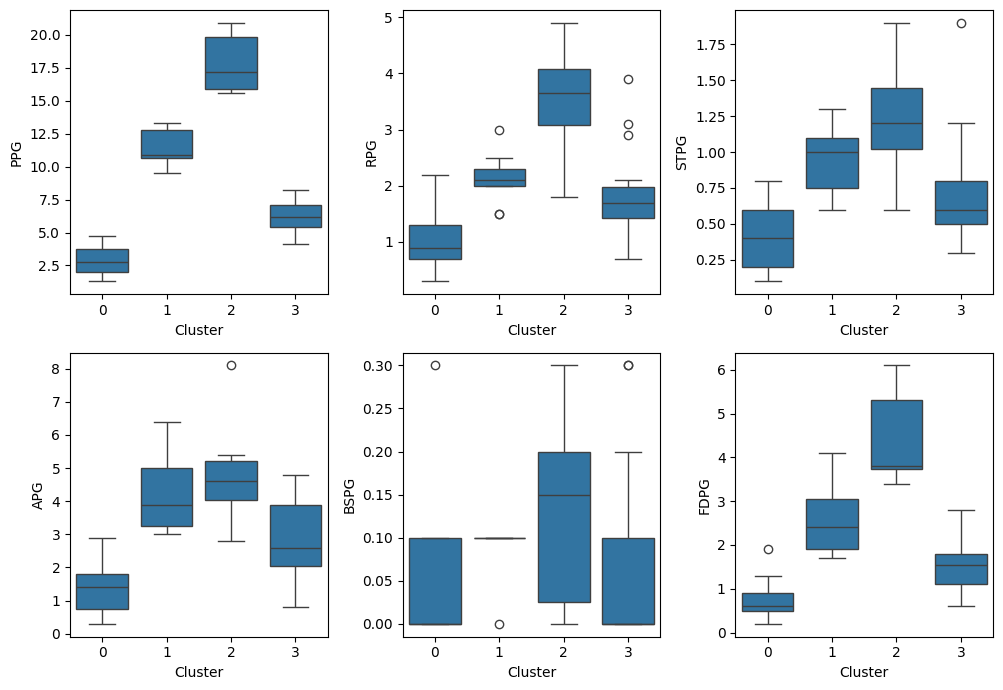

In [17]:
# 箱ひげ図によるクラスタごとの特徴量の比較
# MEMO: なぜ箱ひげ図？他にどういうときに箱ひげ図は活用できる？

csv_header = ["team","PPG", "RPG", "STPG", "APG", "BSPG", "FDPG"]
df_player = pd.DataFrame(X2, columns=csv_header)
df_player['Cluster'] = y_km
plt.figure(figsize=(10, 7))
for num, feature in enumerate(csv_header[1:]): # Cluster以外の列
    plt.subplot(2, 3, num+1)
    sns.boxplot(x='Cluster', y=feature, data=df_player)
plt.tight_layout()
plt.show()

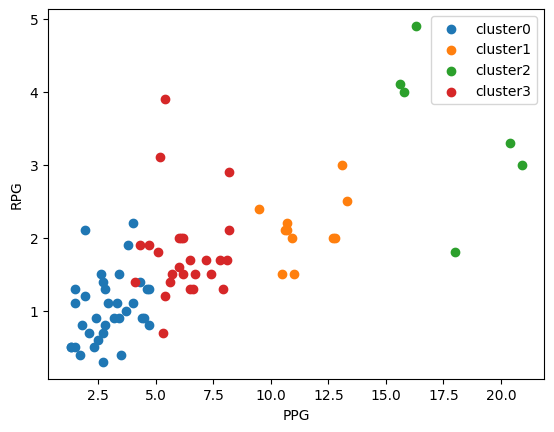

In [19]:
# クラスタごとに色分けしてデータの可視化
plt.xlabel('PPG')
plt.ylabel('RPG')
for n_cluster in np.sort(df_player['Cluster'].unique()):
    plt.scatter(df_player[df_player['Cluster']==n_cluster]['PPG'], df_player[df_player['Cluster']==n_cluster]['RPG'], label=f'cluster{n_cluster}')
plt.legend()